# PKU-MMD

http://www.icst.pku.edu.cn/struct/Projects/PKUMMD.html

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json; from pprint import pprint
Settings = json.load(open('settings.txt'))
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'../')
from os.path import isdir

root = Settings['data_root']

from pak.datasets.PKU_MMD import PKU_MMD, plot_skeleton

data = PKU_MMD(root)

#data.train_videos

skel1, skel2, labels = data.get_3d('0075-L')
skel1_, skel2_, labels_ = data.get_3d('0075-L')

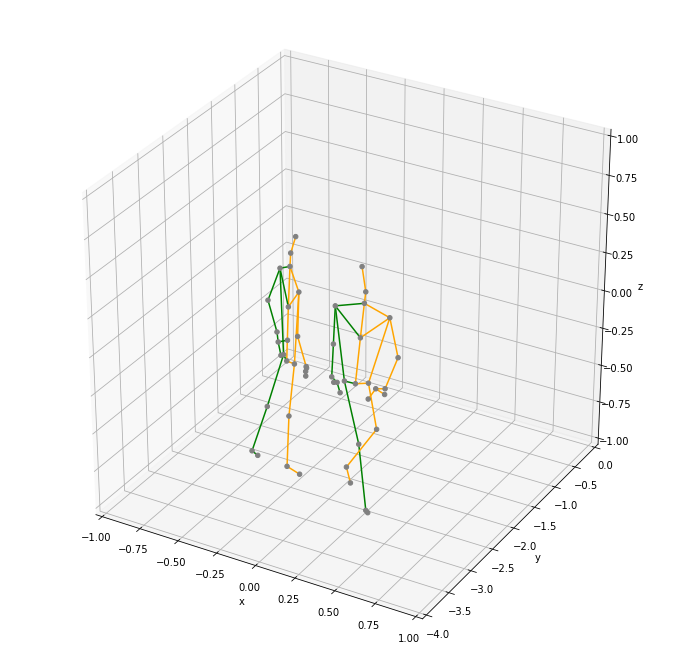

In [9]:
def isclose(a, b, rel_tol=1e-09, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

s1 = skel1[0]
s2 = skel2[0]


fig = plt.figure(figsize=(12, 12))
R = 1
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-R, R); ax.set_xlabel('x')
ax.set_ylim(-2-R*2, 0); ax.set_ylabel('y')
ax.set_zlim(-R, R); ax.set_zlabel('z')


plot_skeleton(ax, s1)

if not isclose(np.mean(np.abs(skel2)), 0):
    plot_skeleton(ax, s2)

plt.show()

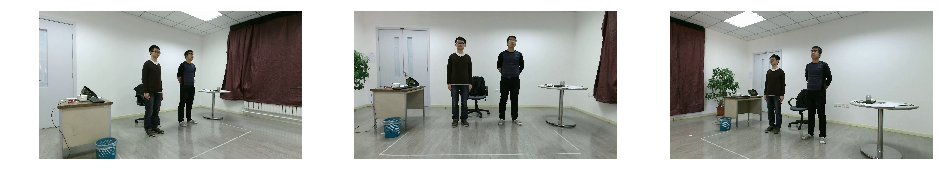

In [5]:
img_L = data.get_frame('0116-L', 1)
img_R = data.get_frame('0116-R', 1)
img_M = data.get_frame('0116-M', 1)


fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(131); ax.axis('off')
ax.imshow(img_L)
ax = fig.add_subplot(132); ax.axis('off')
ax.imshow(img_M)
ax = fig.add_subplot(133); ax.axis('off')
ax.imshow(img_R)
plt.show()

In [40]:
from poseestimation import model

pe = model.PoseEstimator()
I = np.array([
    img_L, img_M, img_R
], np.uint8)
heatmaps, pafs = pe.predict_pafs_and_heatmaps(I)

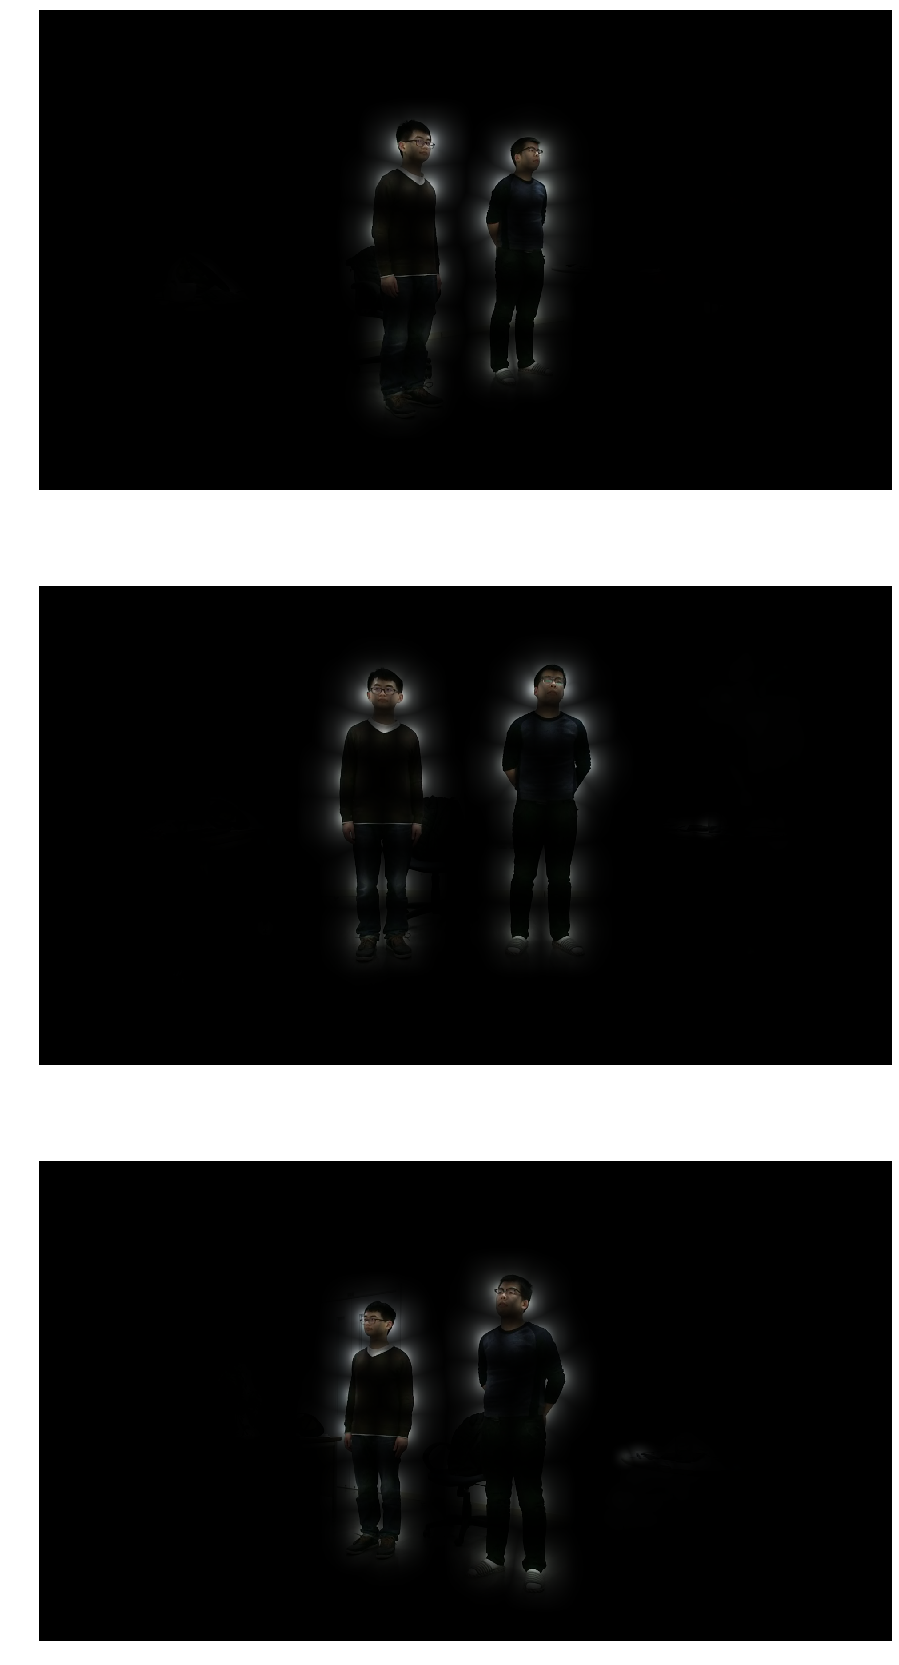

In [41]:
def mask(im, hm):
    H = np.clip(hm, a_min=0, a_max=1)
    im_reduced = im.copy()
    im_reduced[:, :, 0] = im[:, :, 0] * H
    im_reduced[:, :, 1] = im[:, :, 1] * H
    im_reduced[:, :, 2] = im[:, :, 2] * H
    return im_reduced


hm1 = heatmaps[0]
hm2 = heatmaps[1]
hm3 = heatmaps[2]

fig = plt.figure(figsize=(16, 30))
ax = fig.add_subplot(311); ax.axis('off')
ax.imshow(mask(img_L, np.amax(hm1[:, :, 0:18], axis=2)))
ax = fig.add_subplot(312); ax.axis('off')
ax.imshow(mask(img_M, np.amax(hm2[:, :, 0:18], axis=2)))
ax = fig.add_subplot(313); ax.axis('off')
ax.imshow(mask(img_R, np.amax(hm3[:, :, 0:18], axis=2)))
plt.show()